訓練集大小: 16, 驗證集大小: 5
RMSE: 0.748


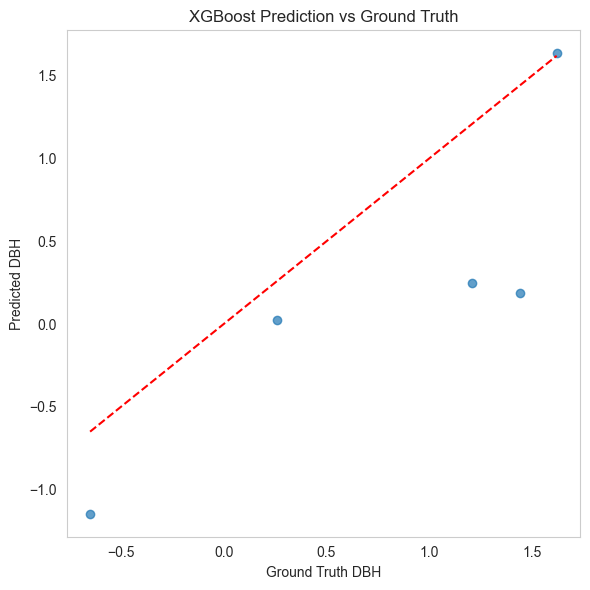

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# 讀取訓練與驗證資料
df_train = pd.read_excel("dataset_newdev_train.xlsx")
df_valid = pd.read_excel("dataset_newdev_val.xlsx")


# 特徵與標籤欄位
features = [ 
    "slice_ratio", "ellipse_fit_rmse",  
    "normal_angle_variance", "cylinder_fit_rmse", 
    "pca_ratio_1", "cylinder_center_offset", "dbh_fit_diff"
]
label_column = "aaa"  

# 分別定義訓練與測試資料
X_train = df_train[features]
y_train = df_train[label_column]

X_valid = df_valid[features]
y_valid = df_valid[label_column]

print(f"訓練集大小: {len(X_train)}, 驗證集大小: {len(X_valid)}")

# 訓練 XGBoost 模型
model = XGBRegressor(n_estimators=50, learning_rate=0.5, max_depth=1, random_state=42)
model.fit(X_train, y_train)

# 預測與 RMSE 評估
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("RMSE:", round(rmse, 3))

# 預測結果視覺化
plt.figure(figsize=(6, 6))
plt.scatter(y_valid, y_pred, alpha=0.7)
plt.xlabel("Ground Truth DBH")
plt.ylabel("Predicted DBH")
plt.title("XGBoost Prediction vs Ground Truth")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.grid()
plt.tight_layout()
plt.show()


                  Feature  Importance
3       cylinder_fit_rmse    0.322913
1        ellipse_fit_rmse    0.204989
0             slice_ratio    0.168017
2   normal_angle_variance    0.162706
6            dbh_fit_diff    0.103496
4             pca_ratio_1    0.030279
5  cylinder_center_offset    0.007600


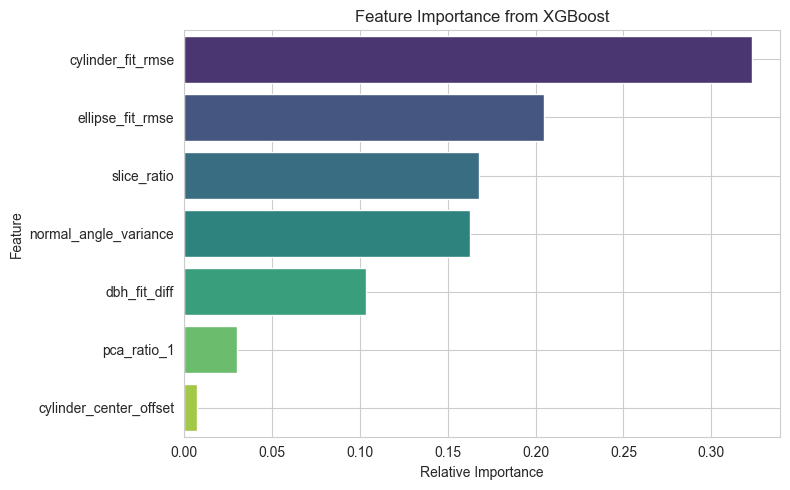

In [25]:

# 特徵重要性分析
importances = model.feature_importances_
feature_names = X_train.columns  # 使用 X_train 的欄位名稱
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 顯示重要性表格
print(feature_importance_df)

# 視覺化長條圖
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance from XGBoost")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True)
plt.show()


In [26]:
new_data = pd.read_excel("dataset_newdev_no.xlsx")  
X_new = new_data[features]
y_new_pred = model.predict(X_new)
new_data["predicted_dbh_cm"] = y_new_pred
new_data.to_excel("predicted_results.xlsx", index=False)
print(new_data.head())

   filename  num_points  slice_ratio    density  std_radius  radius_range  \
0         3        1495        0.146  24498.153       0.042         0.217   
1         4        1716        0.151  22673.700       0.044         0.226   
2         8        2506        0.154  20066.695       0.051         0.266   
3        10        1841        0.153  14991.055       0.047         0.253   
4        12        2121        0.154  24034.152       0.026         0.177   

   mean_radius  radius_skewness  radius_kurtosis  pca_ratio_1  ...  flatness  \
0        0.115            0.462           -0.486       0.5338  ...     1.016   
1        0.124            0.561           -0.415       0.6468  ...     1.051   
2        0.170            0.498           -0.626       0.6086  ...     1.043   
3        0.179            0.260           -0.812       0.5270  ...     1.053   
4        0.159           -0.094            0.141       0.5745  ...     1.043   

   eccentricity  ellipse_fit_rmse  normal_angle_variance